# Explore here

In [25]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge 

from math import ceil

# Problem formulation

We are given a dataset containing US county-level sociodemographic and health resource data for the years 2018 and 2019. We want to find out if there is any relationship between health resources and sociodemographic data.

To do this we will make a predictive model setting the prevalence of any medical condition as our target variable.

# Exploratory analysis

## Data Gathering

Data has already been parsed to a csv file and uploaded to this url : 

`https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv`

In [26]:
URL = 'https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv'
raw_df = pd.read_csv(URL)

## Data overview

In [27]:
raw_df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [28]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [29]:
raw_df.anycondition_prevalence.describe()

count    3140.000000
mean       46.793917
std         6.379448
min        22.000000
25%        42.900000
50%        47.200000
75%        51.000000
max        66.200000
Name: anycondition_prevalence, dtype: float64

In [30]:
for col in raw_df.columns:
    print()
    print(raw_df[col].info())


<class 'pandas.core.series.Series'>
RangeIndex: 3140 entries, 0 to 3139
Series name: fips
Non-Null Count  Dtype
--------------  -----
3140 non-null   int64
dtypes: int64(1)
memory usage: 24.7 KB
None

<class 'pandas.core.series.Series'>
RangeIndex: 3140 entries, 0 to 3139
Series name: TOT_POP
Non-Null Count  Dtype
--------------  -----
3140 non-null   int64
dtypes: int64(1)
memory usage: 24.7 KB
None

<class 'pandas.core.series.Series'>
RangeIndex: 3140 entries, 0 to 3139
Series name: 0-9
Non-Null Count  Dtype
--------------  -----
3140 non-null   int64
dtypes: int64(1)
memory usage: 24.7 KB
None

<class 'pandas.core.series.Series'>
RangeIndex: 3140 entries, 0 to 3139
Series name: 0-9 y/o % of total pop
Non-Null Count  Dtype  
--------------  -----  
3140 non-null   float64
dtypes: float64(1)
memory usage: 24.7 KB
None

<class 'pandas.core.series.Series'>
RangeIndex: 3140 entries, 0 to 3139
Series name: 19-Oct
Non-Null Count  Dtype
--------------  -----
3140 non-null   int64
dtypes: i

In [31]:
for col, series in raw_df.items():
    print(f'{col:25}: {series.notna().count():5} non null, {series.dtype}')

fips                     :  3140 non null, int64
TOT_POP                  :  3140 non null, int64
0-9                      :  3140 non null, int64
0-9 y/o % of total pop   :  3140 non null, float64
19-Oct                   :  3140 non null, int64
10-19 y/o % of total pop :  3140 non null, float64
20-29                    :  3140 non null, int64
20-29 y/o % of total pop :  3140 non null, float64
30-39                    :  3140 non null, int64
30-39 y/o % of total pop :  3140 non null, float64
40-49                    :  3140 non null, int64
40-49 y/o % of total pop :  3140 non null, float64
50-59                    :  3140 non null, int64
50-59 y/o % of total pop :  3140 non null, float64
60-69                    :  3140 non null, int64
60-69 y/o % of total pop :  3140 non null, float64
70-79                    :  3140 non null, int64
70-79 y/o % of total pop :  3140 non null, float64
80+                      :  3140 non null, int64
80+ y/o % of total pop   :  3140 non null, float64
Wh

In [32]:
for col in raw_df.columns:
    print(f'{col:25}: {raw_df.loc[0,col]:10}, {raw_df.loc[1,col]:10}, {raw_df.loc[2,col]:10}')
    

fips                     :       1001,       1003,       1005
TOT_POP                  :      55601,     218022,      24881
0-9                      :       6787,      24757,       2732
0-9 y/o % of total pop   : 12.20661499, 11.35527607, 10.98026607
19-Oct                   :       7637,      26913,       2960
10-19 y/o % of total pop : 13.73536447, 12.3441671, 11.89662795
20-29                    :       6878,      23579,       3268
20-29 y/o % of total pop : 12.37028111, 10.81496363, 13.13452032
30-39                    :       7089,      25213,       3201
30-39 y/o % of total pop : 12.74977069, 11.56442928, 12.86523854
40-49                    :       7582,      27338,       3074
40-49 y/o % of total pop : 13.63644539, 12.53910156, 12.35480889
50-59                    :       7738,      29986,       3278
50-59 y/o % of total pop : 13.91701588, 13.75365789, 13.17471163
60-69                    :       5826,      29932,       3076
60-69 y/o % of total pop : 10.47822881, 13.72888975, 

In [33]:
groups = raw_df.dtypes.groupby(raw_df.dtypes).groups

print('groups by dtype:')
for name, group in groups.items():
    print(f'{name}: {group}')

groups by dtype:
int64: Index(['fips', 'TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59',
       '60-69', '70-79', '80+', 'White-alone pop', 'Black-alone pop',
       'Native American/American Indian-alone pop', 'Asian-alone pop',
       'Hawaiian/Pacific Islander-alone pop', 'Two or more races pop',
       'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018',
       'Less than a high school diploma 2014-18',
       'High school diploma only 2014-18',
       'Some college or associate's degree 2014-18',
       'Bachelor's degree or higher 2014-18', 'POVALL_2018', 'MEDHHINC_2018',
       'CI90LBINC_2018', 'CI90UBINC_2018', 'Civilian_labor_force_2018',
       'Employed_2018', 'Unemployed_2018', 'Median_Household_Income_2018',
       'ICU Beds_x', 'Total Population', 'Population Aged 60+', 'STATE_FIPS',
       'CNTY_FIPS', 'county_pop2018_18 and older', 'anycondition_number',
       'Obesity_number', 'Heart disease_number', 'COPD_number',
       'diabetes_number', 'CKD_

In [34]:
print(f'dtype counts:\n\n{raw_df.dtypes.value_counts()}')

dtype counts:

float64    61
int64      45
object      2
Name: count, dtype: int64


In [35]:
print(f'data has {raw_df.fips.duplicated().sum()} duplicates')
print(f'data has {raw_df.isnull().sum().sum()} null values')

data has 0 duplicates
data has 0 null values


### overview analysis

- The data has no duplicates.
- The data has no null values.
- The only categorical variables in the dataset are `COUNTY_NAME`, `STATE_NAME`, `STATE_FIPS`, `Urban_rural_code` and the columns containing fips codes. (I checked this manually by looking at the names of the columns so there is a chance some of the columns of dtype int64 behave like categorical variables).
- Since `COUNTY_NAME` and `fips` is unordered and it's values are unique, it is not usefull for predictions.
- The columns `CNTY_FIPS` is not useful for predictions since it's value does not reflect any particular propperty of the county, but rather the code that identifies such county within the state.
- One of `STATE_NAME` or `STATE_FIPS` is probably useful for predictions since in the US states might have different laws regarding health resources, this means two counties with similar data may have a very different prevalence for medical conditions because of factors not included in this dataset like budget efficiency, service efficientcy and even maybe cultiral differences.
- There is an error in the naming of the column `19-Oct`, this happened because while parsing the data the column name was interpreted as a date. The actual name should be `10-19`.
- The varialbe `Urban_rural_code` may look as a code for identification but actually it is a continuum, which means it behaves an ordered variable and may be useful for predictions.

## data cleaning
- We will drop `COUNTY_NAME`, `fips`, `CNTY_FIPS` and `STATE_NAME`.
- No rows need to be dropped.

In [36]:
clean_df = raw_df.copy()
clean_df.drop(columns=['COUNTY_NAME', 'fips', 'CNTY_FIPS', 'STATE_NAME'], inplace=True)
clean_df.rename(columns={'19-Oct':'10-19'}, inplace=True)

categorical = ['STATE_FIPS', 'Urban_rural_code']
numerical = [col for col in clean_df.columns if col not in categorical]

## univariate and multivariate analysis

### Figure 1
distribution graphs

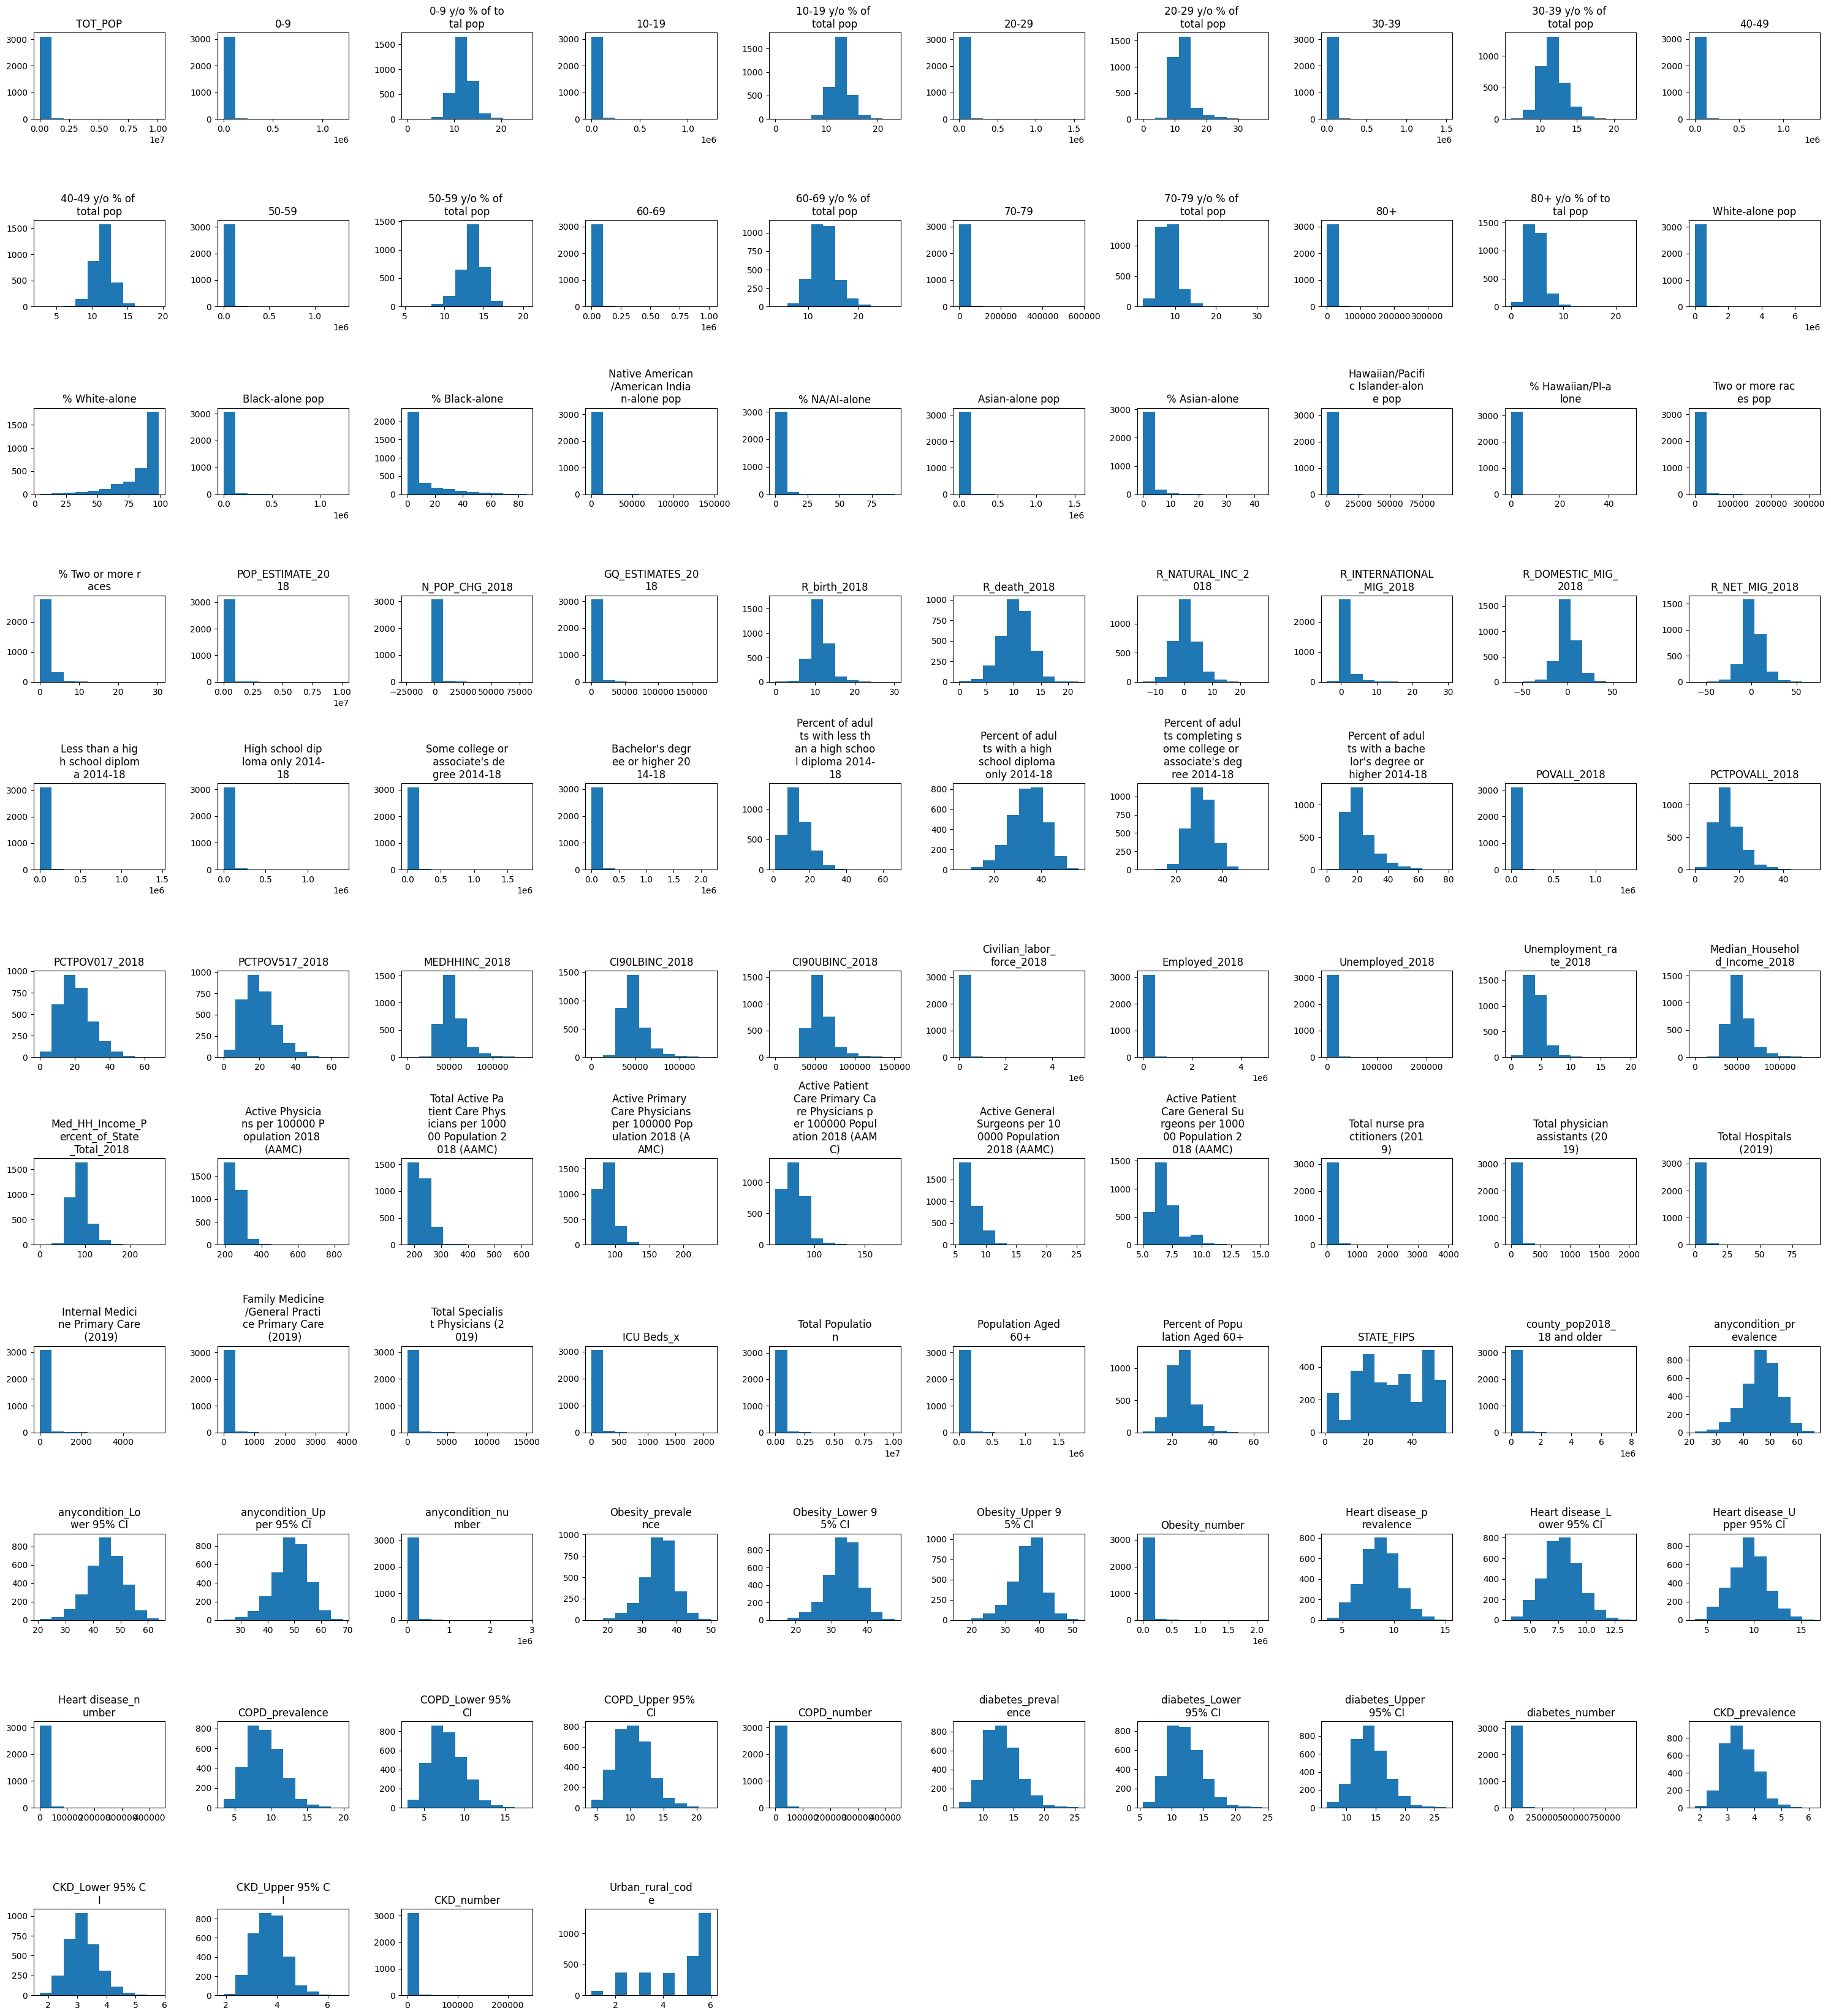

In [37]:
ncols = 10
nrows = ceil(len(clean_df.columns)/ncols)
in_size = 3

fig = plt.figure(figsize=(ncols*in_size, nrows*in_size))
ax: list[Axes]= []

for i, (column, data) in enumerate(clean_df.items()):

    column = '\n'.join([column[i:i+15] for i in range(0, len(column), 15)])

    new_axis = fig.add_subplot(nrows, ncols, i+1)
    ax.append(new_axis)

    ax[i].set_title(f'{column}')
    ax[i].hist(data)

plt.tight_layout()
plt.show()

### Figure 2
variable relation with 

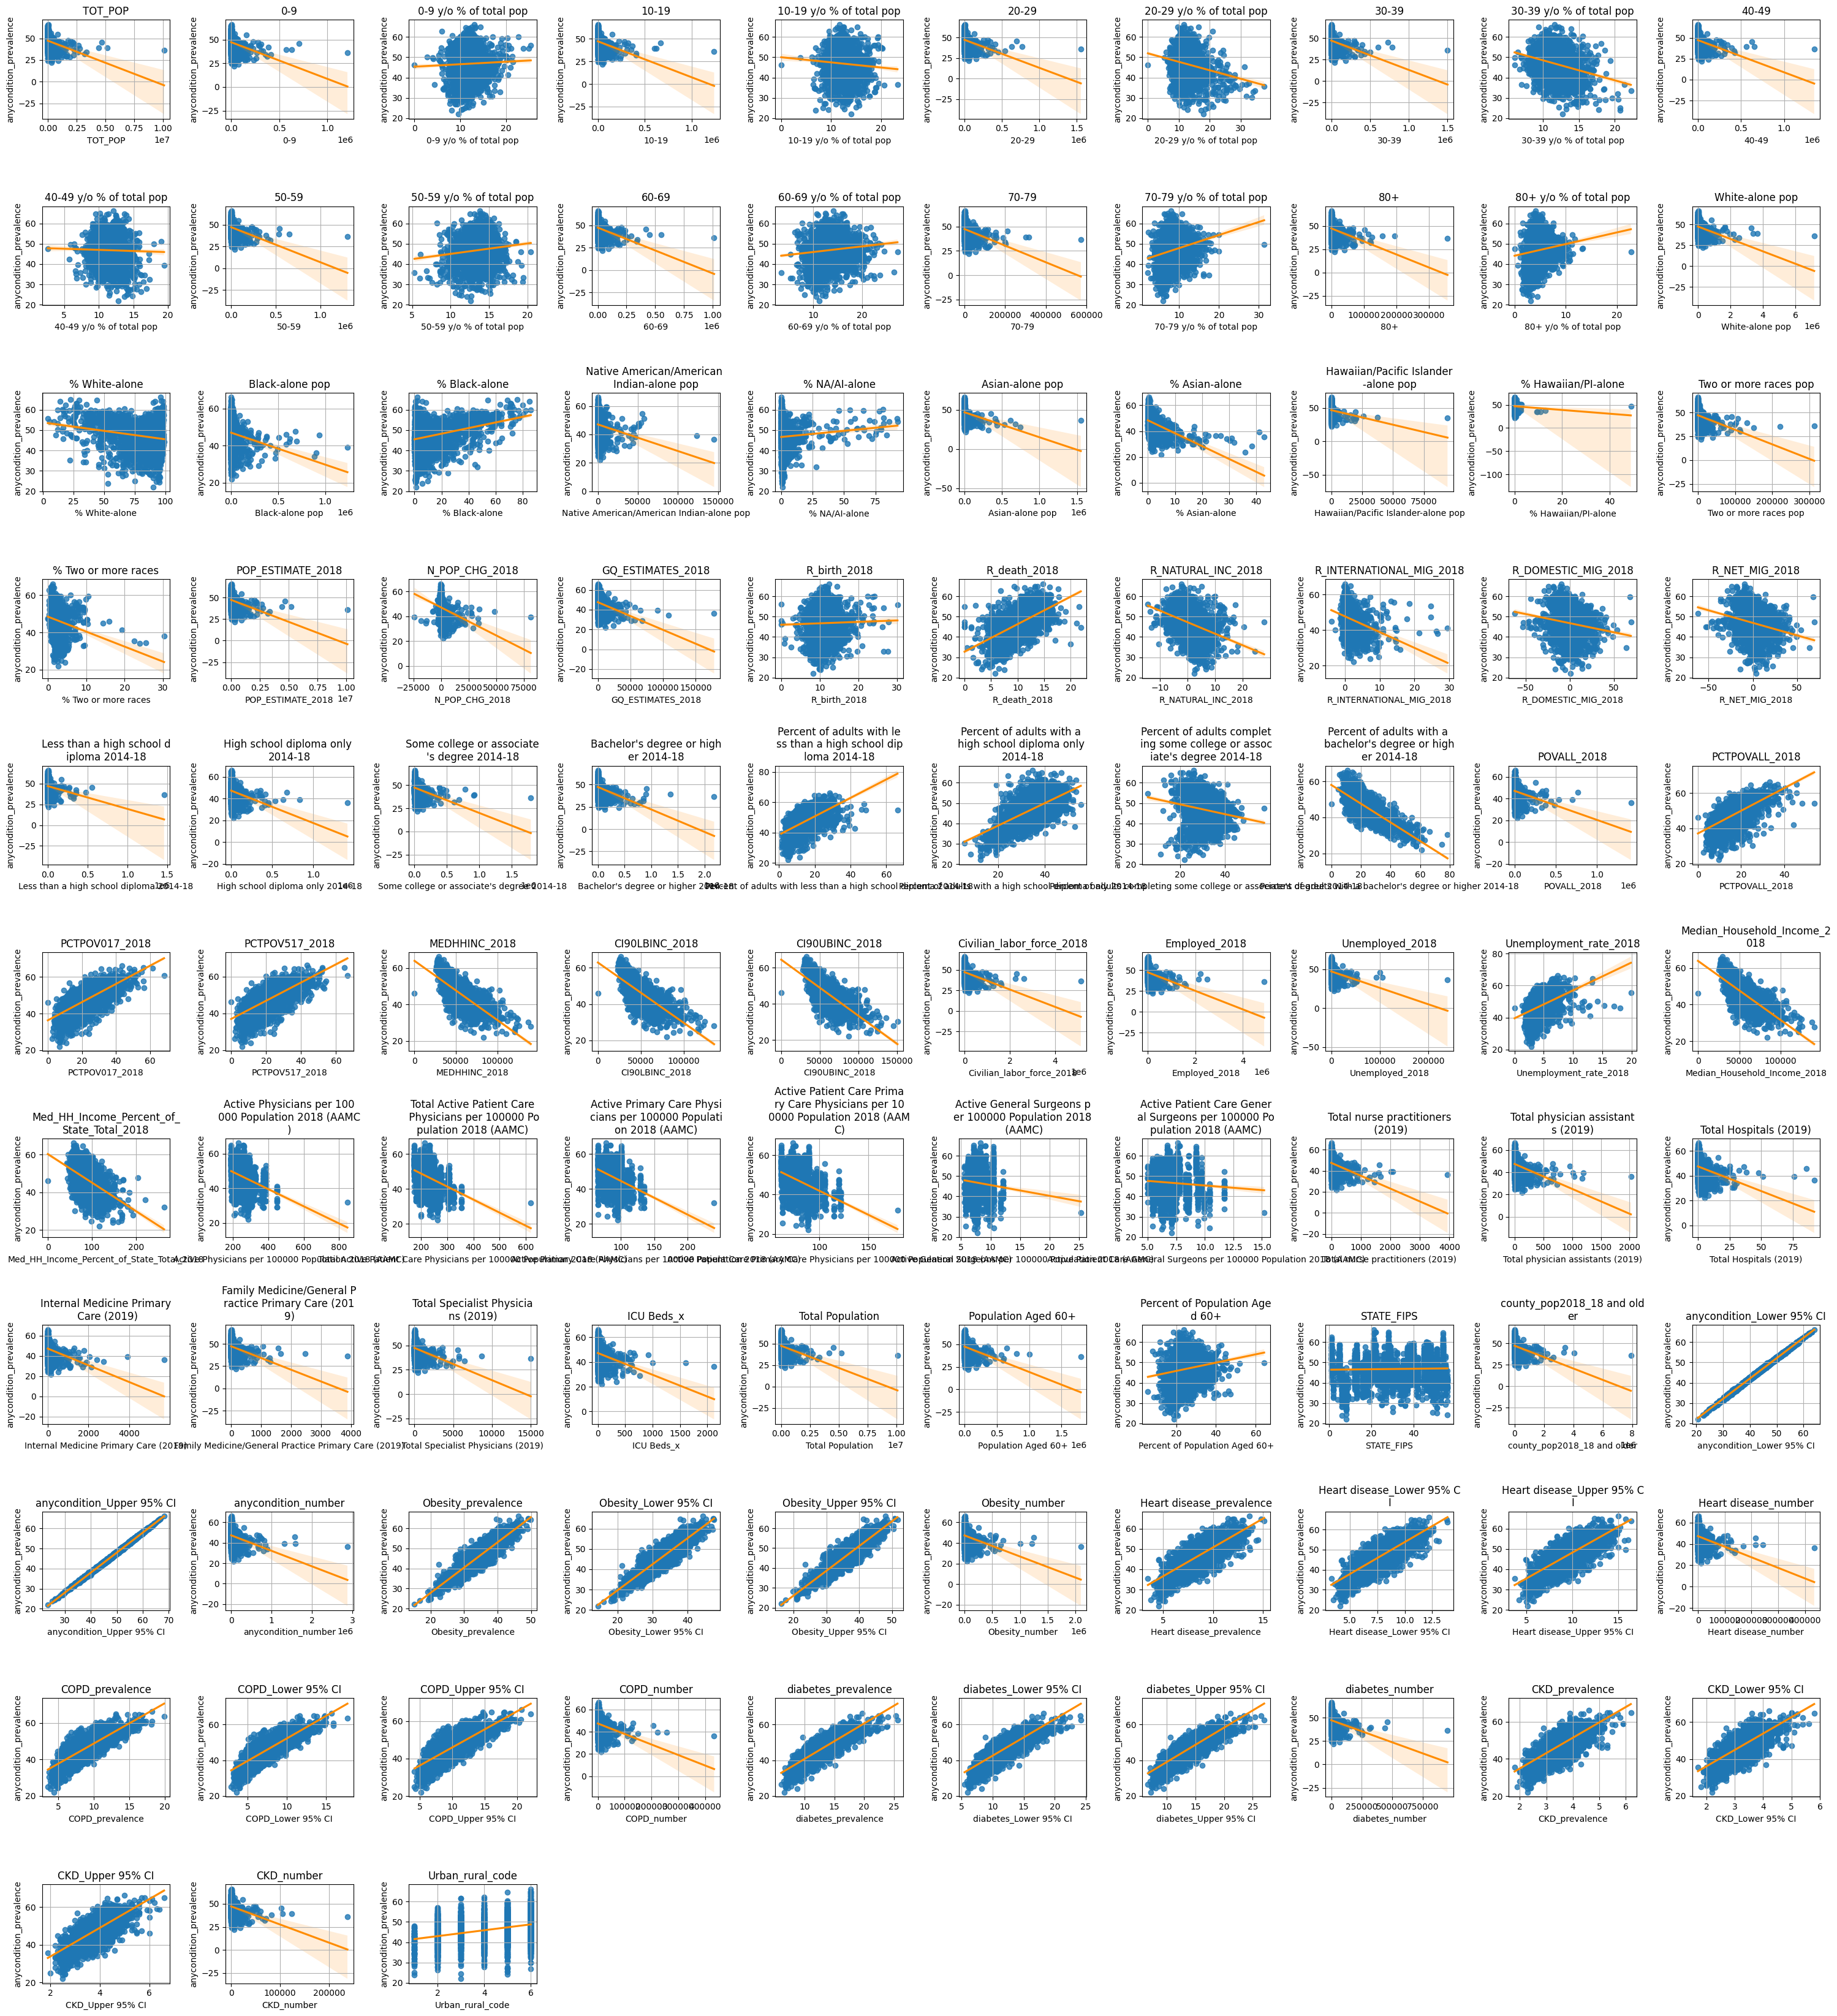

In [38]:
ncols = 10
nrows = ceil(len(clean_df.columns)/ncols)
in_size = 3

fig = plt.figure(figsize=(ncols*in_size, nrows*in_size))
ax: list[Axes]= []

for i, (column, data) in enumerate(clean_df.drop('anycondition_prevalence', axis=1).items()):
    
    column = '\n'.join(column[i:i+25] for i in range(0, len(column), 25))
    
    new_axis = fig.add_subplot(nrows, ncols, i+1)
    ax.append(new_axis)

    ax[i].set_title(f'{column}')
    sns.regplot(x=data, y=clean_df.anycondition_prevalence, line_kws={'color':'darkorange'}, ax=ax[i])
    ax[i].grid(True)

plt.tight_layout()
plt.show()

### Figure 3

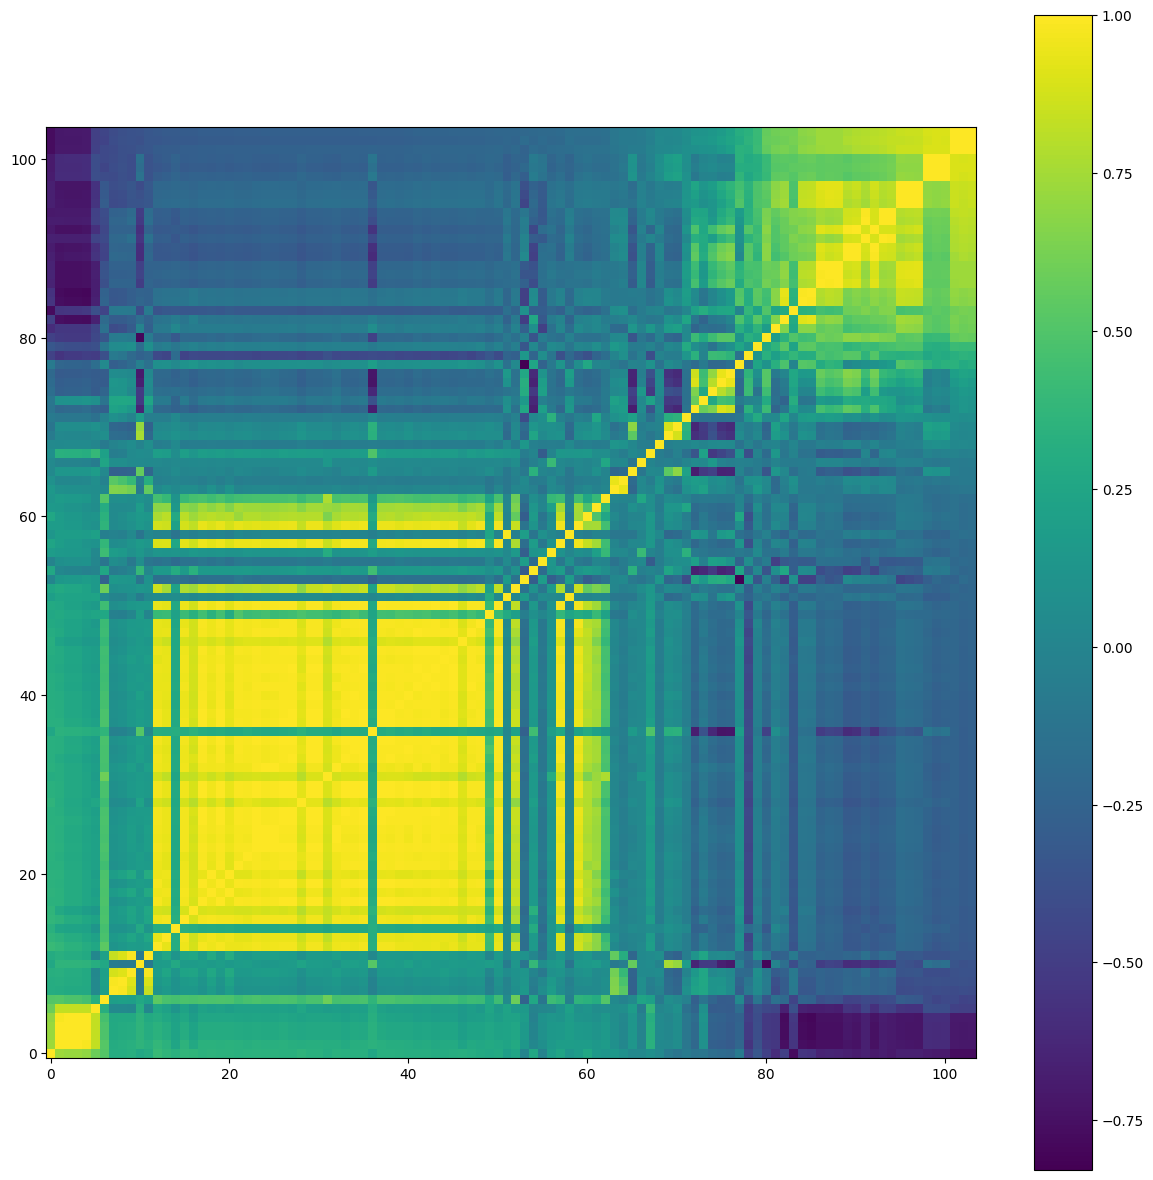

columns ordered from higher to lower correlation (linear)
anycondition_prevalence
anycondition_Upper 95% CI
anycondition_Lower 95% CI
Obesity_prevalence
Obesity_Upper 95% CI
Obesity_Lower 95% CI
diabetes_Upper 95% CI
diabetes_prevalence
diabetes_Lower 95% CI
COPD_Lower 95% CI
COPD_prevalence
Heart disease_Lower 95% CI
COPD_Upper 95% CI
Heart disease_prevalence
Heart disease_Upper 95% CI
CKD_prevalence
CKD_Lower 95% CI
CKD_Upper 95% CI
PCTPOV017_2018
PCTPOV517_2018
Percent of adults with a high school diploma only 2014-18
PCTPOVALL_2018
Percent of adults with less than a high school diploma 2014-18
R_death_2018
Unemployment_rate_2018
Urban_rural_code
% Black-alone
70-79 y/o % of total pop
Percent of Population Aged 60+
80+ y/o % of total pop
50-59 y/o % of total pop
60-69 y/o % of total pop
% NA/AI-alone
0-9 y/o % of total pop
R_birth_2018
STATE_FIPS
40-49 y/o % of total pop
% Hawaiian/PI-alone
10-19 y/o % of total pop
Active Patient Care General Surgeons per 100000 Population 2018 (AAM

In [42]:
plt.figure(figsize=(15,15))

order = clean_df.corr().sort_values('anycondition_prevalence').index

plt.imshow(clean_df[order].corr(), origin='lower')
plt.colorbar()

plt.show()


print('columns ordered from higher to lower correlation (linear)')
for col in order[::-1]:
    print(col)

### Figure 4

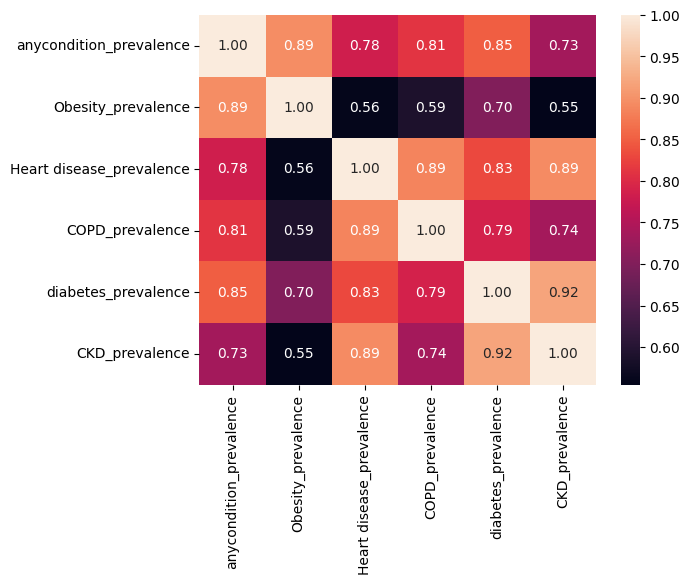

In [43]:
prevalence_cols = [col for col in numerical if 'prevalence' in col]
corr_df = clean_df[prevalence_cols].corr()
sns.heatmap(corr_df, annot=True, fmt='.2f')

plt.show()

### Figure

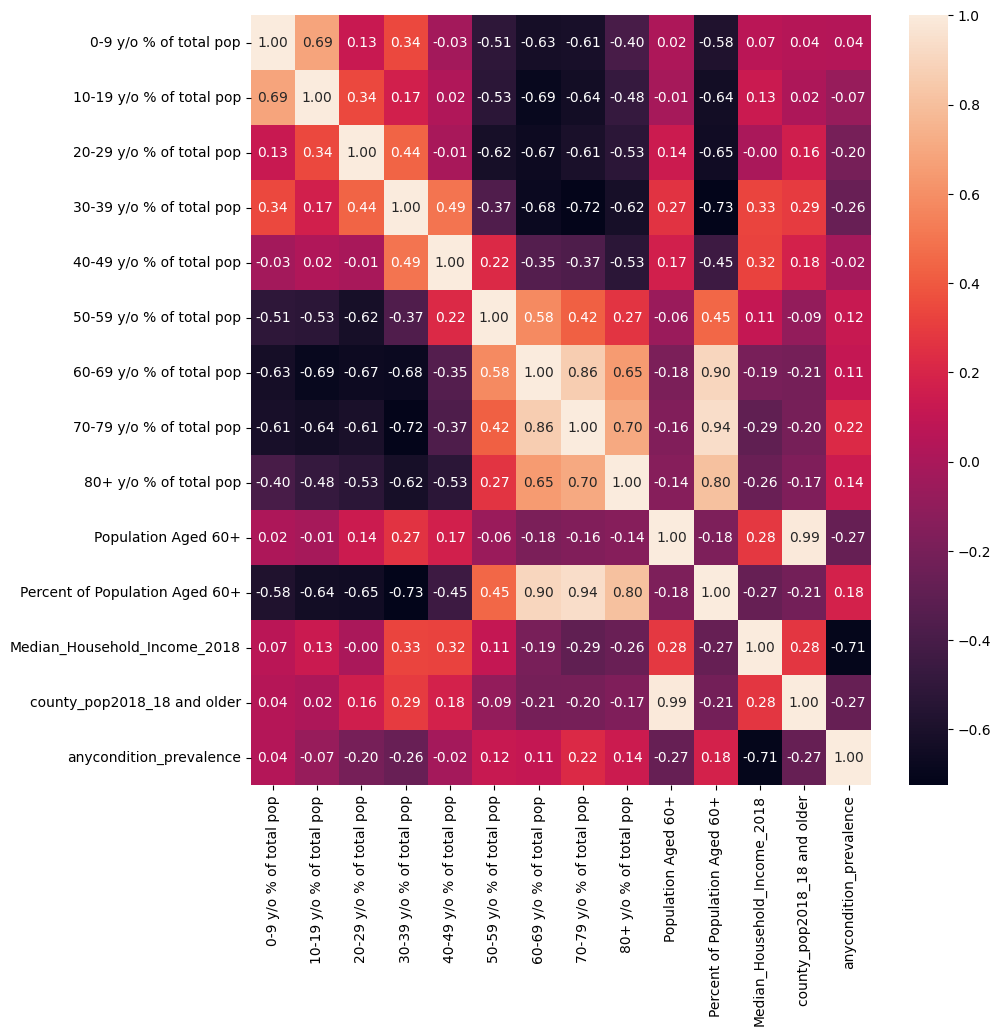

In [44]:
plt.figure(figsize=(10,10))

ages_cols = [col for col in numerical if 'y/o' in col] + [col for col in numerical if 'Age' in col] + [col for col in numerical if 'old' in col] + ['anycondition_prevalence']
corr_df = clean_df[ages_cols].corr()
sns.heatmap(corr_df, annot=True, fmt='.2f')

plt.show()

### data exploration analysis

## feature engineering

# Model creation